https://www.kaggle.com/competitions/widsdatathon2025/data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import necessary python libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score
import lightgbm as lgb, xgboost as xgb, catboost as cb
from gc import collect
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Target Variables

1. **Target Variables**
  - ADHD diagnosis status (ADHD_Outcome)
  - Biological sex (Sex_F)


# Feature Variables

2. **Brain Connectivity Data**
  - fMRI connectome matrices (~19,900 features)
  - Brain region correlation values

3. **Psychological Assessment Scores**
  - Strength and Difficulties Questionnaire (SDQ) - 9 scores
  - Measures of emotional problems, behavioral issues, hyperactivity, peer problems

4. **Parenting Measures**
  - Alabama Parenting Questionnaire (APQ) - 6 scores
  - Parental discipline, involvement, monitoring styles

5. **Clinical Measures**
  - Handedness (Edinburgh Handedness Questionnaire)
  - Color vision ability

6. **Demographic Information**
  - Enrollment year
  - Study site location
  - Child's ethnicity and race
  - Parent's education level

## Questionnaire Features

### Strength and Difficulties Questionnaire (SDQ)

| Feature | Format | Range | Example | Description |
|---------|--------|-------|---------|-------------|
| **SDQ_SDQ_Conduct_Problems** | Integer | 0-10 | 3 | Measures behavior issues like fighting, lying, disobedience. A score of 3 indicates moderate behavioral problems. |
| **SDQ_SDQ_Difficulties_Total** | Integer | 0-40 | 17 | Overall score combining all problem areas. A score of 17 would indicate moderate overall difficulties. |
| **SDQ_SDQ_Emotional_Problems** | Integer | 0-10 | 4 | Measures anxiety, worry, sadness. A score of 4 indicates some emotional challenges. |
| **SDQ_SDQ_Externalizing** | Integer | 0-20 | 12 | Combines conduct problems and hyperactivity scores. A score of 12 suggests significant "acting out" behaviors. |
| **SDQ_SDQ_Generating_Impact** | Integer | 0-10 | 5 | Measures how problems affect daily life. A score of 5 means these issues moderately impact the child's functioning. |
| **SDQ_SDQ_Hyperactivity** | Integer | 0-10 | 8 | Measures restlessness, concentration issues, impulsivity. A score of 8 indicates high levels of hyperactive behavior. |
| **SDQ_SDQ_Internalizing** | Integer | 0-20 | 7 | Combines emotional and peer problems. A score of 7 indicates moderate internal struggles. |
| **SDQ_SDQ_Peer_Problems** | Integer | 0-10 | 3 | Measures friendship difficulties. A score of 3 suggests some challenges with peer relationships. |
| **SDQ_SDQ_Prosocial** | Integer | 0-10 | 7 | Measures positive social behaviors. A score of 7 indicates good prosocial skills. |

### Alabama Parenting Questionnaire (APQ)

| Feature | Format | Range | Example | Description |
|---------|--------|-------|---------|-------------|
| **APQ_P_APQ_P_CP** | Integer | 0-12 | 4 | Corporal Punishment Score. A score of 4 indicates moderate use of physical discipline. |
| **APQ_P_APQ_P_ID** | Integer | 0-28 | 13 | Inconsistent Discipline Score. A score of 13 suggests moderately inconsistent rule enforcement. |
| **APQ_P_APQ_P_INV** | Integer | 0-50 | 40 | Involvement Score. A score of 40 indicates high parental engagement. |
| **APQ_P_APQ_P_OPD** | Integer | 0-28 | 18 | Other Discipline Practices Score. A score of 18 indicates moderate use of alternative discipline approaches. |
| **APQ_P_APQ_P_PM** | Integer | 0-37 | 16 | Poor Monitoring/Supervision Score. A score of 16 suggests moderate lack of parental oversight. |
| **APQ_P_APQ_P_PP** | Integer | 0-30 | 25 | Positive Parenting Score. A score of 25 indicates strong use of positive reinforcement. |

## Other Clinical Measures

| Feature | Format | Range | Example | Description |
|---------|--------|-------|---------|-------------|
| **EHQ_EHQ_Total** | Float | -100 to +100 | 76.67 | Edinburgh Handedness score. A score of 76.67 indicates strong right-handedness. |
| **ColorVision_CV_Score** | Integer | 0-14 | 14 | Color vision test score. A perfect score of 14 indicates normal color vision. |

## Demographic Features

| Feature | Format | Range | Example | Description |
|---------|--------|-------|---------|-------------|
| **Basic_Demos_Enroll_Year** | Integer | (Study years) | 2019 | Year participant joined the study. |
| **Basic_Demos_Study_Site** | Categorical integer | Site-specific codes | 2 | Location code where the participant was tested. |
| **PreInt_Demos_Fam_Child_Ethnicity** | Categorical integer | Ethnicity codes | 0 | The child's ethnic background (e.g., 0 = Not Hispanic or Latino). |
| **PreInt_Demos_Fam_Child_Race** | Categorical integer | Race codes | 1 | The child's racial background (e.g., 1 = White). |
| **Barratt_Barratt_P1_Edu** | Categorical integer | Education codes | 5 | Parent's education level (e.g., 5 = Bachelor's degree). |

## Brain Connectivity Data (Connectome Features)

| Feature | Format | Range | Example | Description |
|---------|--------|-------|---------|-------------|
| **0throw_1stcolumn** | Float | -1 to +1 | 0.327 | Correlation between brain regions 0 and 1. A value of 0.327 indicates moderate positive correlation. |
| **5throw_8thcolumn** | Float | -1 to +1 | -0.156 | Correlation between brain regions 5 and 8. A value of -0.156 indicates weak negative correlation. |
| **12throw_19thcolumn** | Float | -1 to +1 | 0.082 | Correlation between brain regions 12 and 19. A value of 0.082 indicates very weak positive correlation. |
| **64throw_80thcolumn** | Float | -1 to +1 | 0.511 | Correlation between brain regions 64 and 80. A value of 0.511 indicates strong positive correlation. |
| **98throw_112thcolumn** | Float | -1 to +1 | -0.372 | Correlation between brain regions 98 and 112. A value of -0.372 indicates moderate negative correlation. |

## Data Patterns and Interpretation

### SDQ Score Interpretation Examples:
- A child with SDQ_SDQ_Hyperactivity = 8, SDQ_SDQ_Conduct_Problems = 5 likely shows significant ADHD symptoms
- A child with SDQ_SDQ_Emotional_Problems = 7, SDQ_SDQ_Peer_Problems = 6 might be experiencing anxiety and social isolation

### Connectome Interpretation Examples:
- Strong positive correlation (0.7) between frontal and parietal regions might indicate good executive function
- Negative correlation (-0.4) between amygdala and prefrontal regions could indicate emotional regulation difficulties

### Parenting and ADHD Connection:
- High APQ_P_APQ_P_ID (20) combined with high SDQ_SDQ_Hyperactivity (9) might suggest inconsistent discipline contributing to ADHD symptoms
- High APQ_P_APQ_P_PP (27) might be associated with better behavioral outcomes even in children with ADHD


# Load all the data from the input files
1. Training Dataset : Merge the quantitative, categorical metadata files & solution data
2. Training Dataset : Merge the quantitative, categorical metadata files

In [8]:
# Function to load all data
def get_feats(mode='train'):

    # Load quantitative metadata
    feats = pd.read_excel('/content/drive/MyDrive/BTT WIDS 1/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx')

    # Load categorical metadata with the correct filename depending on mode
    if mode == 'TRAIN':
        cate = pd.read_excel('/content/drive/MyDrive/BTT WIDS 1/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx')

    elif mode == 'TEST':
        cate = pd.read_excel('/content/drive/MyDrive/BTT WIDS 1/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx')

    # Merge categorical data
    feats = feats.merge(cate, on='participant_id', how='left')

    # Load functional connectome matrices
    func = pd.read_csv('/content/drive/MyDrive/BTT WIDS 1/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
    feats = feats.merge(func, on='participant_id', how='left')

    # If training data, merge with solution file
    if mode == 'TRAIN':
        solution = pd.read_excel('/content/drive/MyDrive/BTT WIDS 1/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx')
        feats = feats.merge(solution, on='participant_id', how='left')

    return feats


In [9]:

# Load data
train = get_feats(mode='TRAIN')
test = get_feats(mode='TEST')

sub = pd.read_excel('/content/drive/MyDrive/BTT WIDS 1/widsdatathon2025/SAMPLE_SUBMISSION.xlsx')
y = pd.read_excel('/content/drive/MyDrive/BTT WIDS 1/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx')


# Set index
train.set_index('participant_id', inplace=True)
test.set_index('participant_id', inplace=True)

# Define targets and features
targets = ['ADHD_Outcome', 'Sex_F']
non_connectome_features = [col for col in train.columns if not (col.startswith('0throw') or col.startswith('1throw') or
                                                             col.startswith('2throw') or col.startswith('3throw') or
                                                             col.startswith('4throw') or col.startswith('5throw') or
                                                             col.startswith('6throw') or col.startswith('7throw') or
                                                             col.startswith('8throw') or col.startswith('9throw') or
                                                             col in targets)]

connectome_features = [col for col in train.columns if (col.startswith('0throw') or col.startswith('1throw') or
                                                      col.startswith('2throw') or col.startswith('3throw') or
                                                      col.startswith('4throw') or col.startswith('5throw') or
                                                      col.startswith('6throw') or col.startswith('7throw') or
                                                      col.startswith('8throw') or col.startswith('9throw'))]

## BASIC DESCRIPTIVE STATISTICS

### TRAINING DATASET

In [10]:
print("Number of rows: ",train.shape[0])
print("Number of columns: ",train.shape[1])

Number of rows:  1213
Number of columns:  19929


### TESTING DATASET

In [11]:
print("Number of rows: ",test.shape[0])
print("Number of columns: ",test.shape[1])

Number of rows:  1213
Number of columns:  19927


In [12]:
print("\nDataset Overview:")
print(f"Training data: {train.shape[0]} participants, {train.shape[1]} features")
print(f"Test data: {test.shape[0]} participants, {test.shape[1]} features")
print(f"Number of non-connectome features: {len(non_connectome_features)}")
print(f"Number of brain connectivity features: {len(connectome_features)}")



Dataset Overview:
Training data: 1213 participants, 19929 features
Test data: 1213 participants, 19927 features
Number of non-connectome features: 17982
Number of brain connectivity features: 1945


In [13]:
train.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,...,-0.004378,0.001610,0.115171,0.049984,0.058144,0.093527,0.089403,0.128946,0.685078,0.342951
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,...,0.042900,0.047424,0.057128,0.051664,0.057674,0.054594,0.058036,0.058490,0.464676,0.474891
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.178688,-0.138048,-0.070094,-0.153540,-0.131455,-0.085566,-0.204160,-0.083077,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,...,-0.033798,-0.030132,0.080291,0.015827,0.022316,0.059621,0.053224,0.090459,0.000000,0.000000
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,...,-0.003724,0.000990,0.113640,0.052705,0.059151,0.093397,0.088612,0.127913,1.000000,0.000000
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,...,0.024007,0.032268,0.150524,0.082526,0.095192,0.127144,0.127613,0.166523,1.000000,1.000000
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,...,0.180562,0.192015,0.375635,0.228748,0.322084,0.348153,0.267162,0.414304,1.000000,1.000000


In [14]:
train.head()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
participant_id,,,,,,,,,,,,,,,,,,,,,
UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,...,-0.058396,-0.041544,0.142806,-0.006377,0.108005,0.148327,0.093230,-0.004984,1,1
CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,...,-0.025624,-0.031863,0.162011,0.067439,0.017155,0.088893,0.064094,0.194381,1,0
Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,...,0.010771,-0.044341,0.128386,0.047282,0.087678,0.146221,-0.009425,0.035150,1,0
p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,...,-0.007152,0.032584,0.121726,0.045089,0.154464,0.106817,0.065336,0.234708,1,1
M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,...,-0.010196,0.035638,0.074978,0.030579,0.025640,0.118199,0.112522,0.143666,1,1


# HANDLING MISSING VALUES

In [15]:
# Check for missing values in the training data
missing = train.isnull().sum()
missing_percent = 100 * missing / len(train)
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
})


# Display features with missing values
missing_features = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
print("\nFeatures with missing values in training data:")
missing_features



Features with missing values in training data:


,Missing Values,Percentage
MRI_Track_Age_at_Scan,360,29.678483
PreInt_Demos_Fam_Child_Ethnicity,11,0.906843


In [16]:
# Import the imputer
from sklearn.impute import SimpleImputer

# Get the list of columns that have missing values
columns_with_missing = missing_features.index.tolist()
print(f"Number of columns with missing values: {len(columns_with_missing)}")

# Create an imputer that will replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer only to the columns that have missing values
train[columns_with_missing] = imputer.fit_transform(train[columns_with_missing])

# Do the same for the test set if needed
test[columns_with_missing] = imputer.transform(test[columns_with_missing])

# Verify that missing values have been filled
missing_after = train[columns_with_missing].isnull().sum().sum()
print(f"Missing values after imputation: {missing_after}")
print("All missing values have been replaced with column means")

Number of columns with missing values: 2
Missing values after imputation: 0
All missing values have been replaced with column means


In [17]:
# Check for missing values in the testing data
missing = test.isnull().sum()
missing_percent = 100 * missing / len(test)
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
})


# Display features with missing values
missing_features = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
print("\nFeatures with missing values in training data:")
missing_features



Features with missing values in training data:


,Missing Values,Percentage
Basic_Demos_Enroll_Year,1213,100.0
Basic_Demos_Study_Site,1213,100.0
PreInt_Demos_Fam_Child_Race,1213,100.0
MRI_Track_Scan_Location,1213,100.0
Barratt_Barratt_P1_Edu,1213,100.0
Barratt_Barratt_P1_Occ,1213,100.0
Barratt_Barratt_P2_Edu,1213,100.0
Barratt_Barratt_P2_Occ,1213,100.0


In [18]:

# Categorical columns - we'll use the most common value to fill in missing data
categorical_columns = [
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Occ',
    'PreInt_Demos_Fam_Child_Race'
]

# Numerical columns - we'll use the average value to fill in missing data
numerical_columns = [
    'SDQ_SDQ_Difficulties_Total',
    'SDQ_SDQ_Prosocial',
    'SDQ_SDQ_Peer_Problems',
    'SDQ_SDQ_Internalizing',
    'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Generating_Impact',
    'SDQ_SDQ_Emotional_Problems',
    'SDQ_SDQ_Externalizing',
    'SDQ_SDQ_Conduct_Problems',
    'APQ_P_APQ_P_PP',
    'APQ_P_APQ_P_PM',
    'APQ_P_APQ_P_OPD',
    'APQ_P_APQ_P_INV',
    'APQ_P_APQ_P_ID',
    'APQ_P_APQ_P_CP',
    'ColorVision_CV_Score',
    'EHQ_EHQ_Total'
]


mode_imputer = SimpleImputer(strategy='most_frequent')  # For categorical data
mean_imputer = SimpleImputer(strategy='mean')           # For numerical data


print("Filling in missing categorical data with most common values...")
mode_imputer.fit(train[categorical_columns])
test[categorical_columns] = mode_imputer.transform(test[categorical_columns])


print("Filling in missing numerical data with average values...")
mean_imputer.fit(train[numerical_columns])
test[numerical_columns] = mean_imputer.transform(test[numerical_columns])

print("Done! All missing values have been filled in.")

Filling in missing categorical data with most common values...
Filling in missing numerical data with average values...
Done! All missing values have been filled in.


In [19]:
test.isnull().sum()

,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,0
APQ_P_APQ_P_ID,0
APQ_P_APQ_P_INV,0
...,...
196throw_198thcolumn,0
196throw_199thcolumn,0
197throw_198thcolumn,0
197throw_199thcolumn,0


# VISUALIZE DATA PATTERNS

## Visualization 1 : Strength & Difficulties Questionnaire

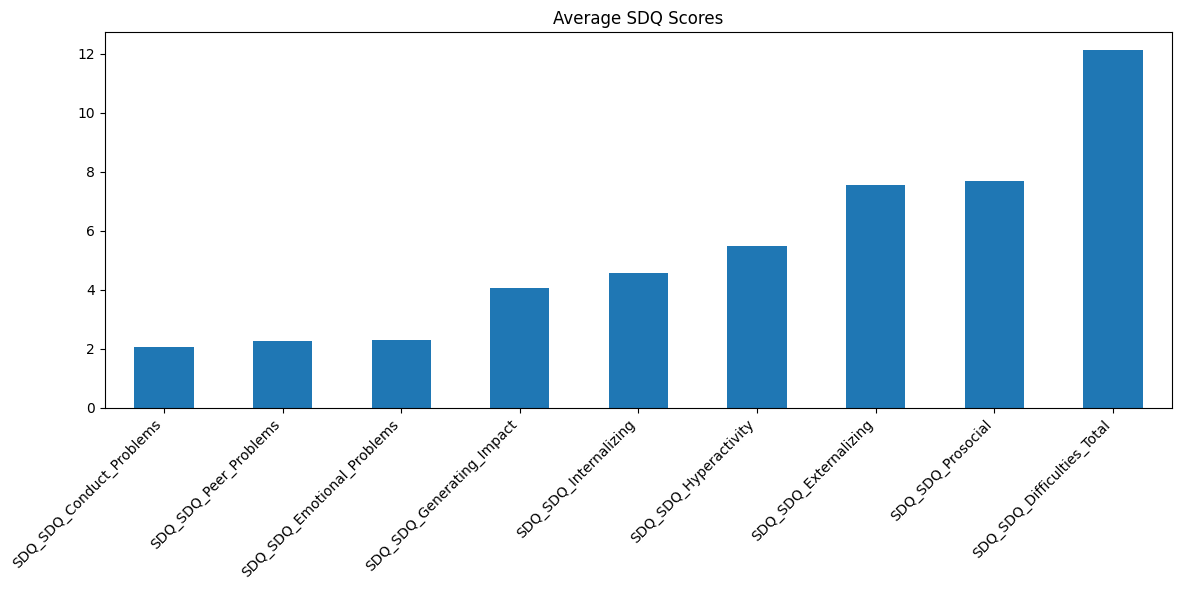

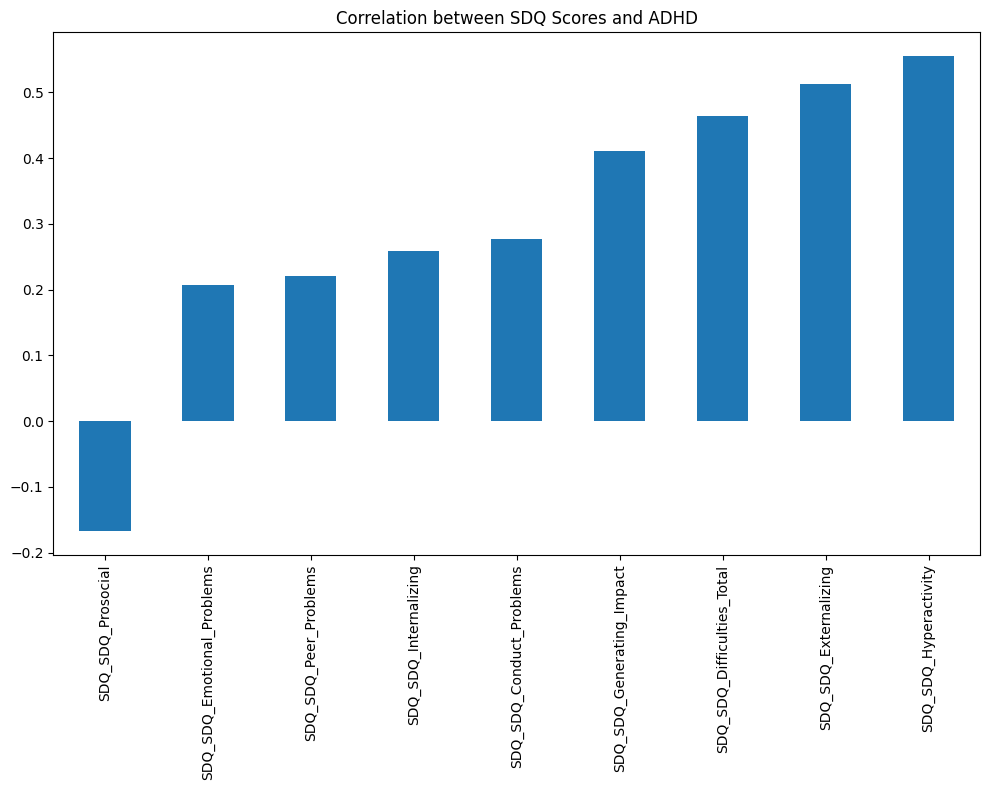

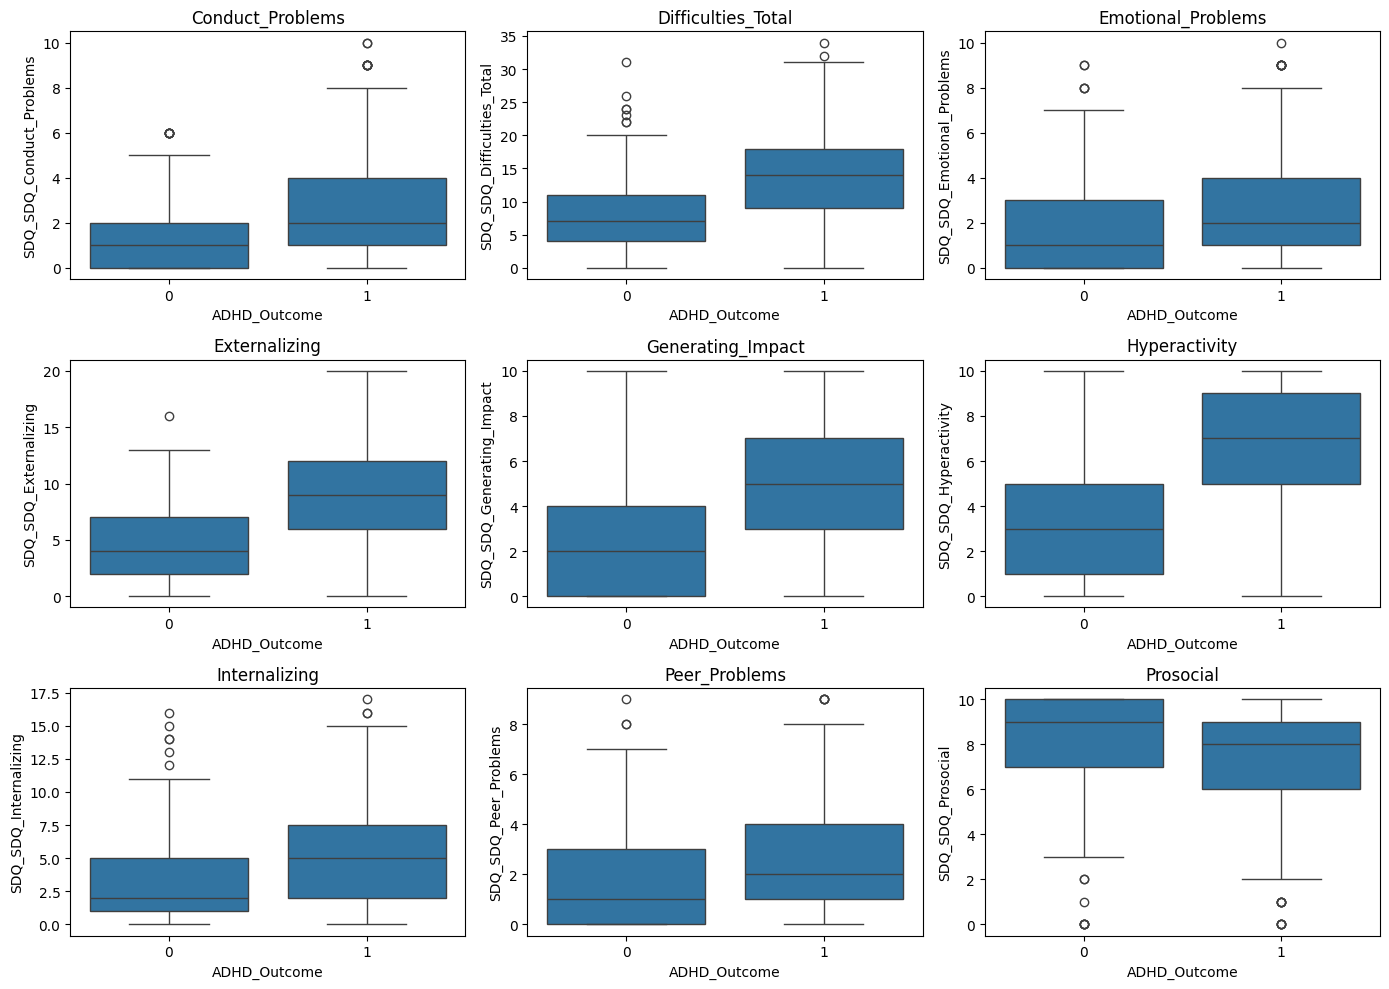

In [20]:

sdq_vars = [col for col in train.columns if col.startswith('SDQ')]

# 1. Distribution overview
fig, ax = plt.subplots(figsize=(12, 6))
train[sdq_vars].mean().sort_values().plot(kind='bar', ax=ax)
plt.title('Average SDQ Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Correlation with ADHD
plt.figure(figsize=(10, 8))
sdq_adhd_corr = train[sdq_vars + ['ADHD_Outcome']].corr()['ADHD_Outcome'].drop('ADHD_Outcome').sort_values()
sdq_adhd_corr.plot(kind='bar')
plt.title('Correlation between SDQ Scores and ADHD')
plt.tight_layout()
plt.show()

# 3. Box plots by ADHD diagnosis
plt.figure(figsize=(14, 10))
for i, var in enumerate(sdq_vars):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='ADHD_Outcome', y=var, data=train)
    plt.title(var.split('SDQ_SDQ_')[1])
plt.tight_layout()
plt.show()

## Visualization 2 : Parenting Questionnaire

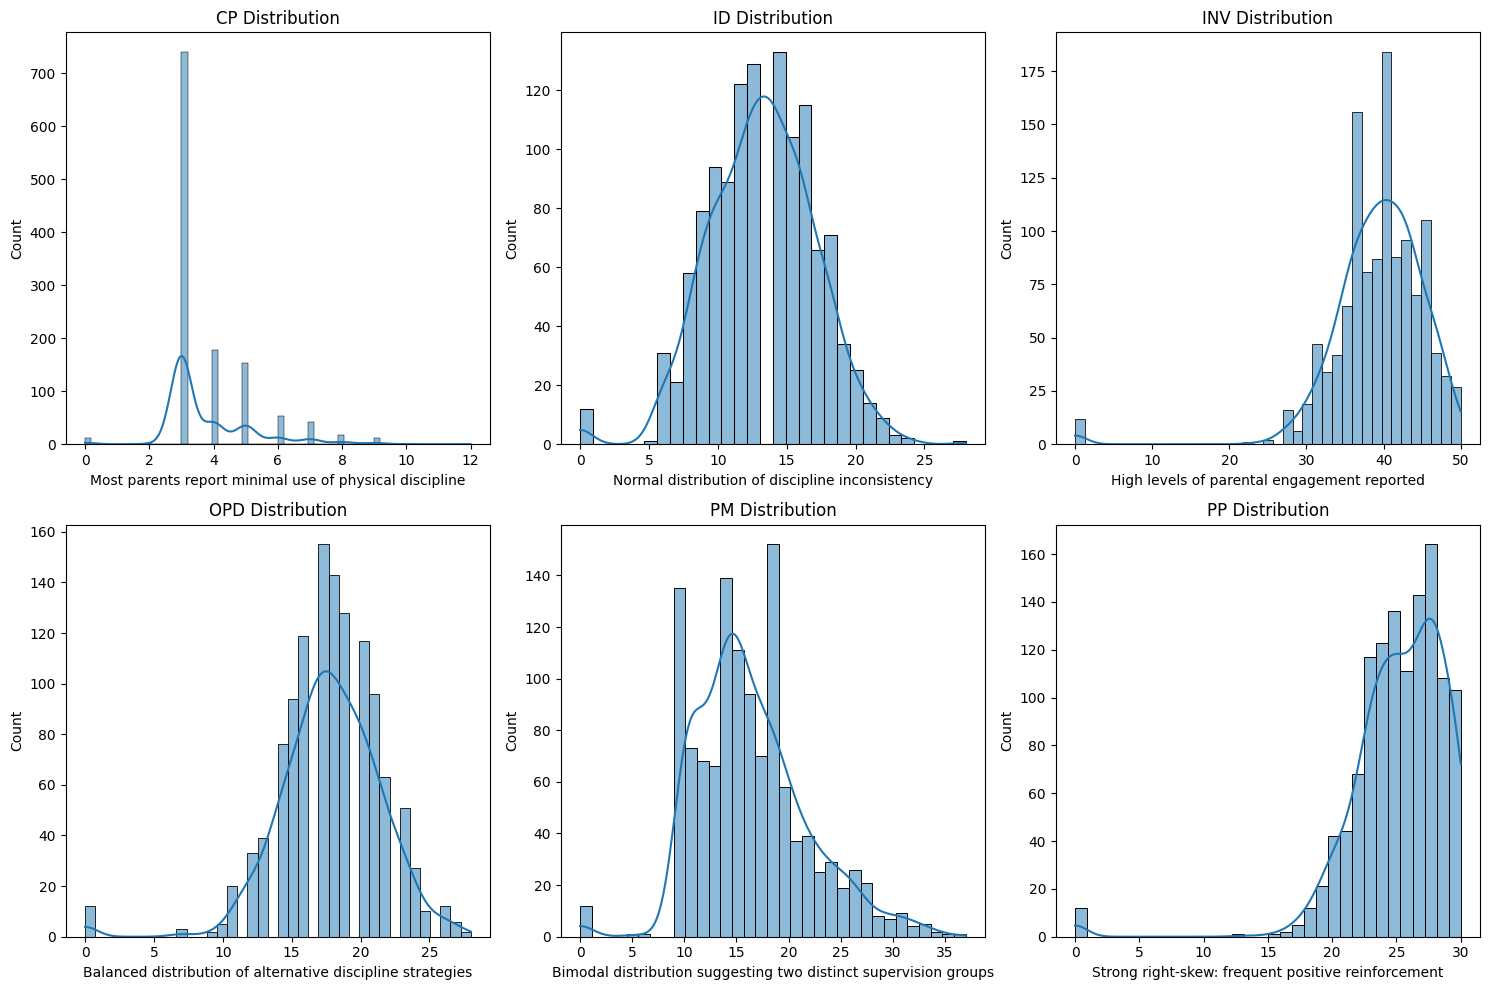

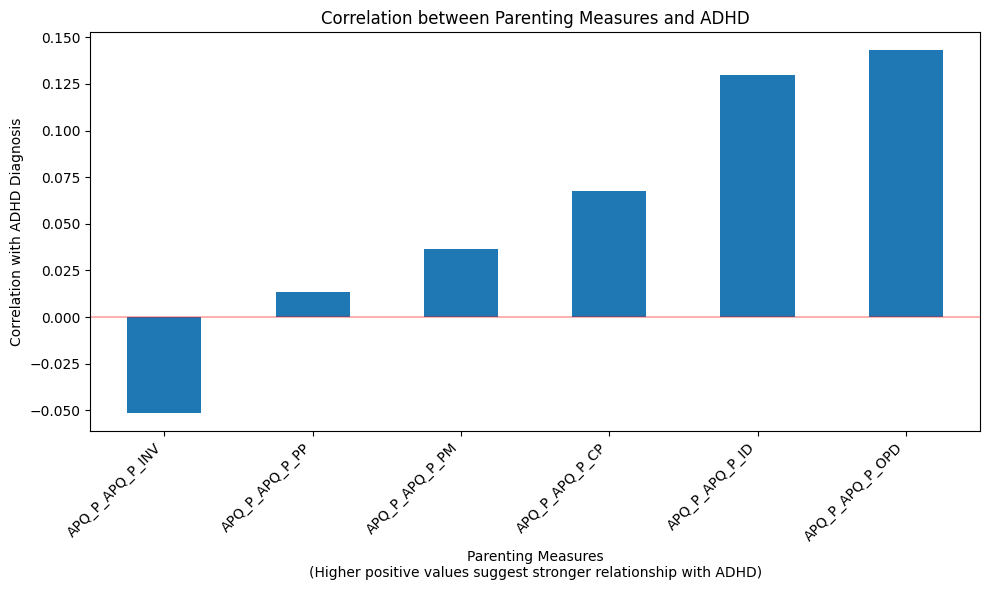

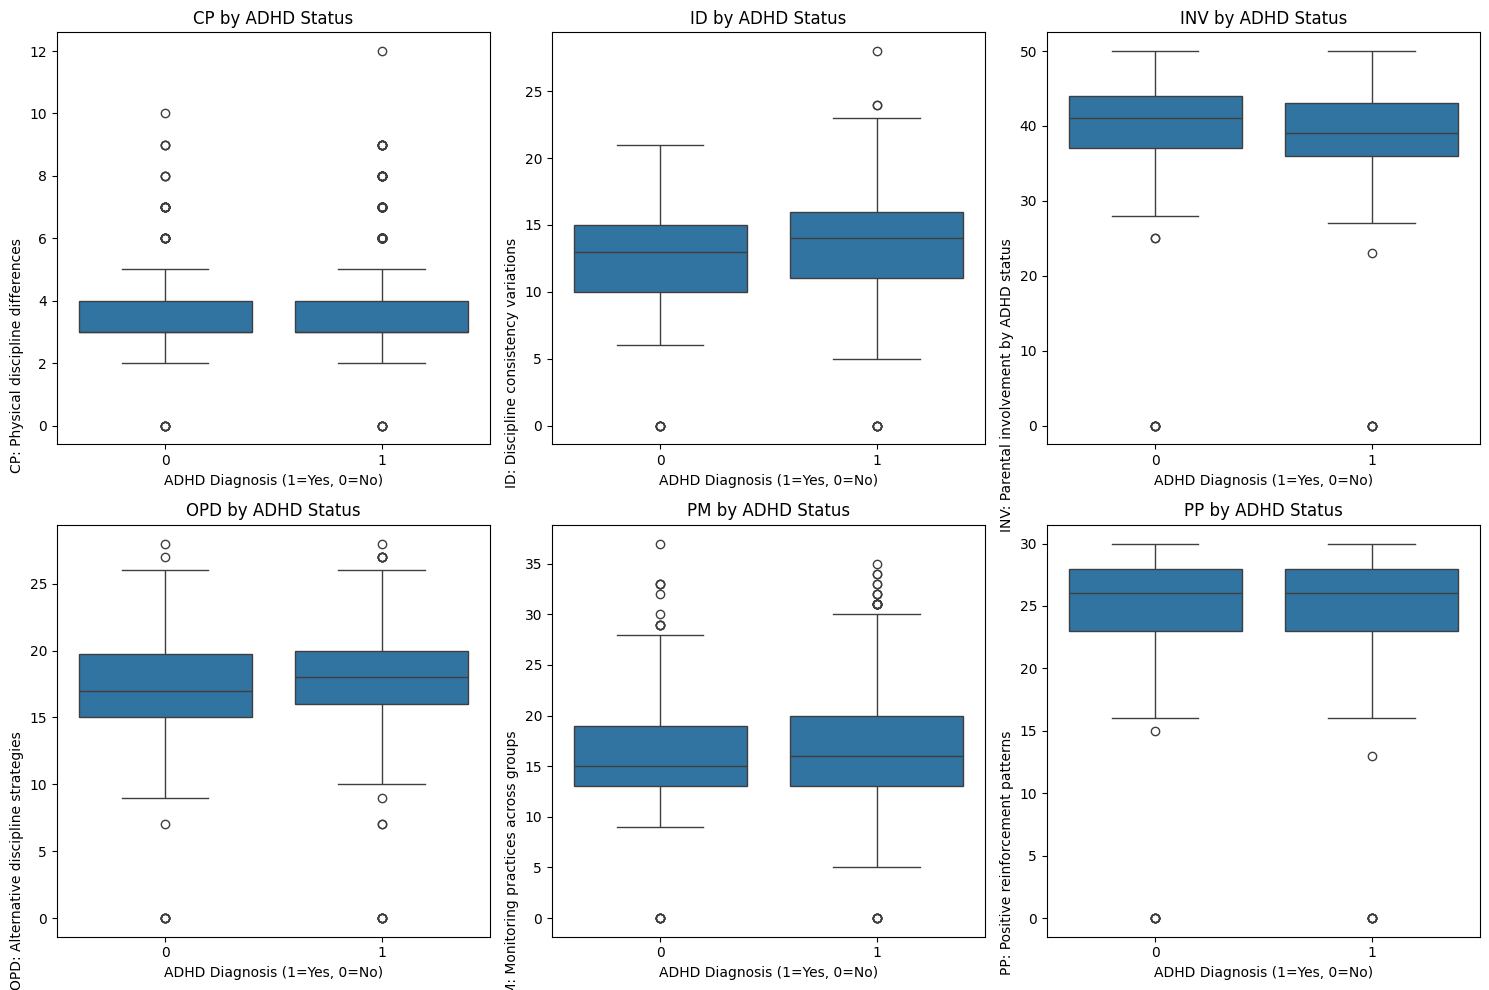

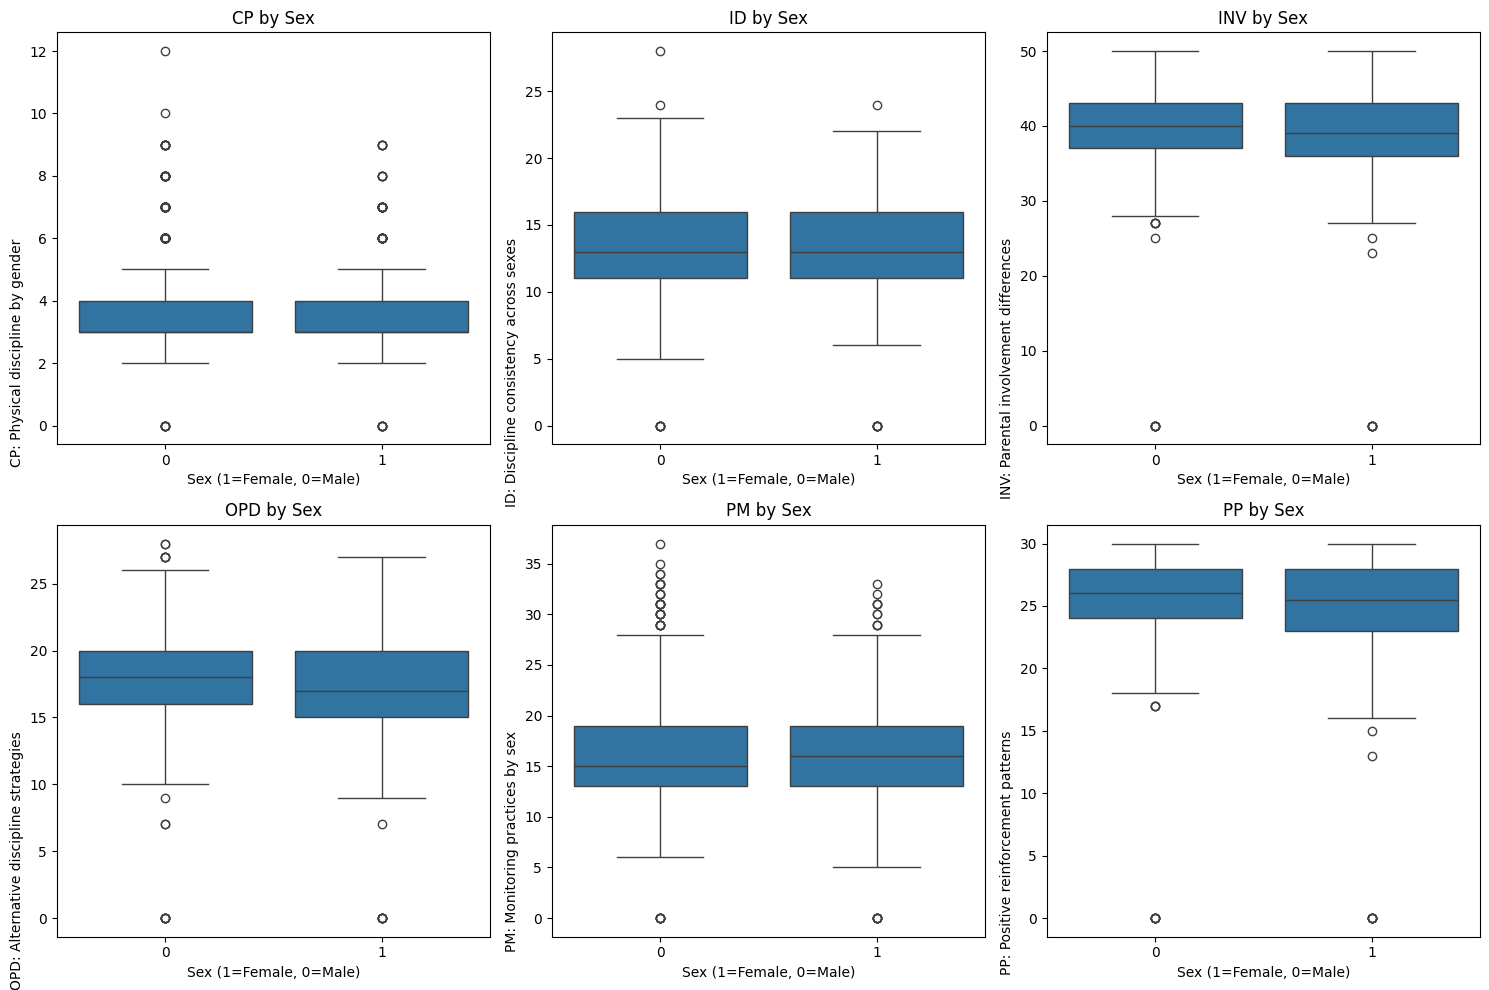

'\nDetailed Observations:\n- Corporal Punishment (CP): Most parents report minimal use of physical discipline, with scores heavily concentrated at the low end.\n- Inconsistent Discipline (ID): Parents show a normal distribution of inconsistency in rule enforcement, with most showing moderate levels.\n- Involvement (INV): Parents typically report high levels of engagement with their children, with most scores in the upper range.\n- Other Discipline Practices (OPD): Alternative discipline strategies show a balanced distribution with most parents using a moderate amount.\n- Poor Monitoring (PM): The bimodal distribution suggests two distinct groups of parents regarding supervision practices.\n- Positive Parenting (PP): The strong right-skew indicates that most parents report frequent use of praise and positive reinforcement.\n\nCorrelation Insights:\n- Higher levels of parental engagement (spending time with children, participating in their activities, talking about their day, etc.) is as

In [21]:
# APQ Features EDA
apq_vars = [col for col in train.columns if 'APQ_P_APQ_P' in col]

# 1. Distribution of APQ scores
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, var in enumerate(apq_vars):
    sns.histplot(train[var], kde=True, ax=axes[i])
    var_name = var.replace('APQ_P_APQ_P_', '')
    axes[i].set_title(f'{var_name} Distribution')

# Add descriptive labels for distribution charts
labels = [
    "Most parents report minimal use of physical discipline",
    "Normal distribution of discipline inconsistency",
    "High levels of parental engagement reported",
    "Balanced distribution of alternative discipline strategies",
    "Bimodal distribution suggesting two distinct supervision groups",
    "Strong right-skew: frequent positive reinforcement"
]

for i, label in enumerate(labels):
    axes[i].set_xlabel(label, wrap=True)

plt.tight_layout()
plt.show()

# 2. Correlation between parenting measures and ADHD
corr_apq_adhd = train[apq_vars + ['ADHD_Outcome']].corr()['ADHD_Outcome'].drop('ADHD_Outcome')
plt.figure(figsize=(10, 6))
corr_plot = corr_apq_adhd.sort_values().plot(kind='bar')
plt.title('Correlation between Parenting Measures and ADHD')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation with ADHD Diagnosis')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.xlabel('Parenting Measures\n(Higher positive values suggest stronger relationship with ADHD)', wrap=True)
plt.tight_layout()
plt.show()

# 3. Compare distributions by ADHD diagnosis
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, var in enumerate(apq_vars):
    sns.boxplot(x='ADHD_Outcome', y=var, data=train, ax=axes[i])
    var_name = var.replace('APQ_P_APQ_P_', '')
    axes[i].set_title(f'{var_name} by ADHD Status')
    axes[i].set_xlabel('ADHD Diagnosis (1=Yes, 0=No)')

# Add descriptive labels for ADHD status charts
labels = [
    "CP: Physical discipline differences",
    "ID: Discipline consistency variations",
    "INV: Parental involvement by ADHD status",
    "OPD: Alternative discipline strategies",
    "PM: Monitoring practices across groups",
    "PP: Positive reinforcement patterns"
]

for i, label in enumerate(labels):
    axes[i].set_ylabel(label, rotation=90, ha='right')

plt.tight_layout()
plt.show()

# 4. Relationship between parenting styles and sex
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, var in enumerate(apq_vars):
    sns.boxplot(x='Sex_F', y=var, data=train, ax=axes[i])
    var_name = var.replace('APQ_P_APQ_P_', '')
    axes[i].set_title(f'{var_name} by Sex')
    axes[i].set_xlabel('Sex (1=Female, 0=Male)')

# Add descriptive labels for sex comparison charts
labels = [
    "CP: Physical discipline by gender",
    "ID: Discipline consistency across sexes",
    "INV: Parental involvement differences",
    "OPD: Alternative discipline strategies",
    "PM: Monitoring practices by sex",
    "PP: Positive reinforcement patterns"
]

for i, label in enumerate(labels):
    axes[i].set_ylabel(label, rotation=90, ha='right')

plt.tight_layout()
plt.show()

"""
Detailed Observations:
- Corporal Punishment (CP): Most parents report minimal use of physical discipline, with scores heavily concentrated at the low end.
- Inconsistent Discipline (ID): Parents show a normal distribution of inconsistency in rule enforcement, with most showing moderate levels.
- Involvement (INV): Parents typically report high levels of engagement with their children, with most scores in the upper range.
- Other Discipline Practices (OPD): Alternative discipline strategies show a balanced distribution with most parents using a moderate amount.
- Poor Monitoring (PM): The bimodal distribution suggests two distinct groups of parents regarding supervision practices.
- Positive Parenting (PP): The strong right-skew indicates that most parents report frequent use of praise and positive reinforcement.

Correlation Insights:
- Higher levels of parental engagement (spending time with children, participating in their activities, talking about their day, etc.) is associated with somewhat lower rates of ADHD diagnosis.
"""


- **Corporal Punishment (CP)**: Most parents report minimal use of physical discipline, with scores heavily concentrated at the low end.

- **Inconsistent Discipline (ID)**: Parents show a normal distribution of inconsistency in rule enforcement, with most showing moderate levels.

- **Involvement (INV)**: Parents typically report high levels of engagement with their children, with most scores in the upper range.

- **Other Discipline Practices (OPD)**: Alternative discipline strategies show a balanced distribution with most parents using a moderate amount.

- **Poor Monitoring (PM)**: The bimodal distribution suggests two distinct groups of parents regarding supervision practices.

- **Positive Parenting (PP)**: The strong right-skew indicates that most parents report frequent use of praise and positive reinforcement.

## Visualization 3 : Clinical Measures

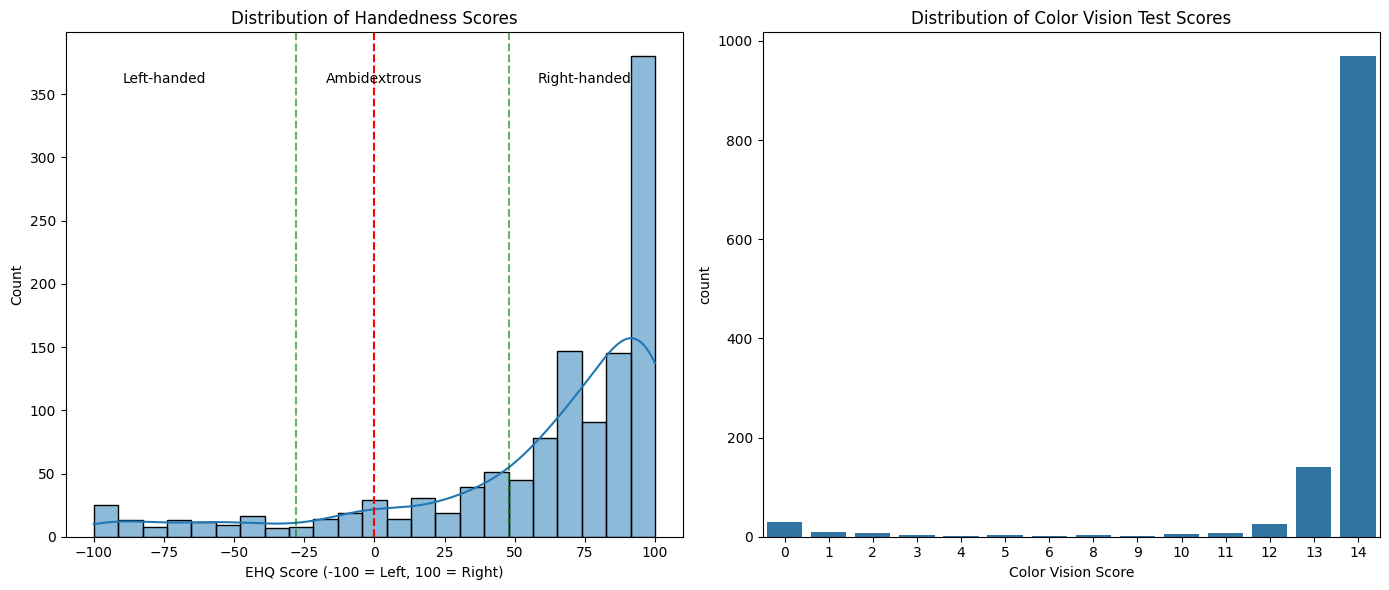

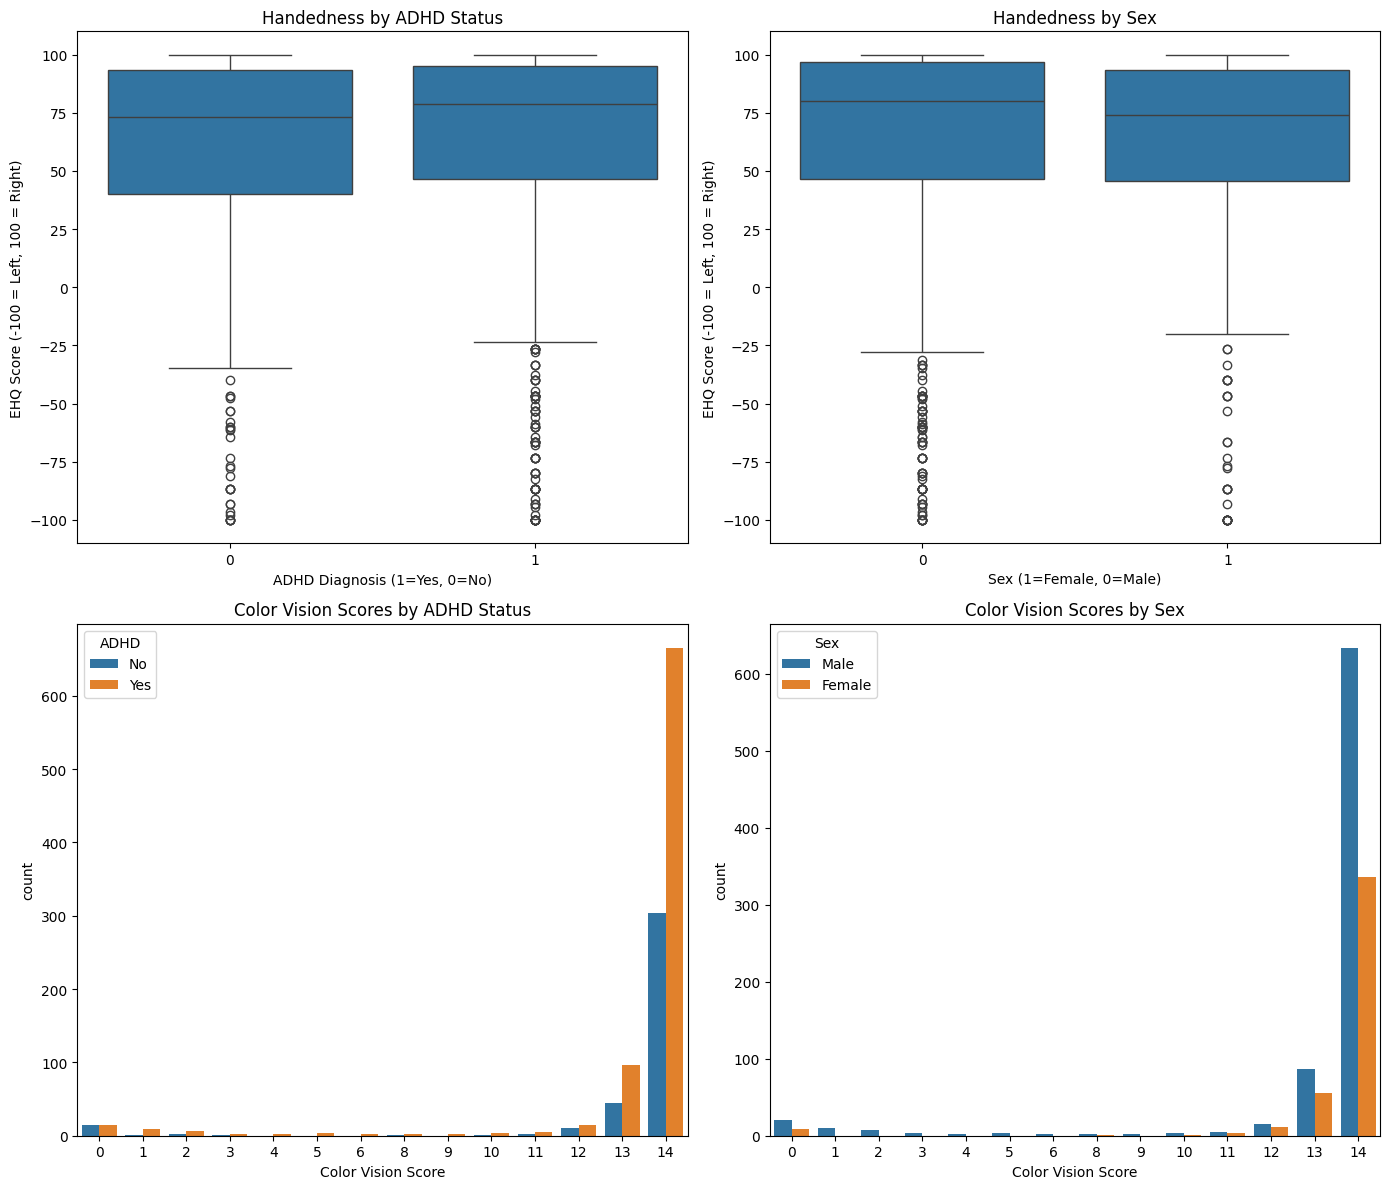

Statistical Tests for Clinical Measures:
Handedness difference by ADHD: t-stat=0.599, p-value=0.549
Handedness difference by Sex: t-stat=0.015, p-value=0.988
Color vision association with ADHD: chi2=12.625, p-value=0.477
Color vision association with Sex: chi2=19.523, p-value=0.108


In [22]:
# Clinical Measures EDA (Handedness and Color Vision)
clinical_vars = ['EHQ_EHQ_Total', 'ColorVision_CV_Score']

# 1. Distribution of clinical measures
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Handedness distribution
sns.histplot(train['EHQ_EHQ_Total'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Handedness Scores')
axes[0].set_xlabel('EHQ Score (-100 = Left, 100 = Right)')
axes[0].axvline(x=0, color='r', linestyle='--')

# Add vertical lines for handedness categories
axes[0].axvline(x=-28, color='g', linestyle='--', alpha=0.6)
axes[0].axvline(x=48, color='g', linestyle='--', alpha=0.6)
# Add text for handedness regions
axes[0].text(-75, axes[0].get_ylim()[1]*0.9, 'Left-handed', ha='center')
axes[0].text(0, axes[0].get_ylim()[1]*0.9, 'Ambidextrous', ha='center')
axes[0].text(75, axes[0].get_ylim()[1]*0.9, 'Right-handed', ha='center')

# Color vision distribution
sns.countplot(x=train['ColorVision_CV_Score'], ax=axes[1])
axes[1].set_title('Distribution of Color Vision Test Scores')
axes[1].set_xlabel('Color Vision Score')

plt.tight_layout()
plt.show()

# 2. Relationship with ADHD and Sex
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Handedness by ADHD
sns.boxplot(x='ADHD_Outcome', y='EHQ_EHQ_Total', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Handedness by ADHD Status')
axes[0, 0].set_xlabel('ADHD Diagnosis (1=Yes, 0=No)')
axes[0, 0].set_ylabel('EHQ Score (-100 = Left, 100 = Right)')

# Handedness by Sex
sns.boxplot(x='Sex_F', y='EHQ_EHQ_Total', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Handedness by Sex')
axes[0, 1].set_xlabel('Sex (1=Female, 0=Male)')
axes[0, 1].set_ylabel('EHQ Score (-100 = Left, 100 = Right)')

# Color vision by ADHD
sns.countplot(x='ColorVision_CV_Score', hue='ADHD_Outcome', data=train, ax=axes[1, 0])
axes[1, 0].set_title('Color Vision Scores by ADHD Status')
axes[1, 0].set_xlabel('Color Vision Score')
axes[1, 0].legend(title='ADHD', labels=['No', 'Yes'])

# Color vision by Sex
sns.countplot(x='ColorVision_CV_Score', hue='Sex_F', data=train, ax=axes[1, 1])
axes[1, 1].set_title('Color Vision Scores by Sex')
axes[1, 1].set_xlabel('Color Vision Score')
axes[1, 1].legend(title='Sex', labels=['Male', 'Female'])

plt.tight_layout()
plt.show()

# 3. Statistical tests for differences
print("Statistical Tests for Clinical Measures:")

# Handedness by ADHD
from scipy.stats import ttest_ind
adhd_positive = train.loc[train['ADHD_Outcome'] == 1, 'EHQ_EHQ_Total']
adhd_negative = train.loc[train['ADHD_Outcome'] == 0, 'EHQ_EHQ_Total']
t_stat, p_val = ttest_ind(adhd_positive, adhd_negative)
print(f"Handedness difference by ADHD: t-stat={t_stat:.3f}, p-value={p_val:.3f}")

# Handedness by Sex
male = train.loc[train['Sex_F'] == 0, 'EHQ_EHQ_Total']
female = train.loc[train['Sex_F'] == 1, 'EHQ_EHQ_Total']
t_stat, p_val = ttest_ind(male, female)
print(f"Handedness difference by Sex: t-stat={t_stat:.3f}, p-value={p_val:.3f}")

# Color vision by ADHD
from scipy.stats import chi2_contingency
color_adhd_contingency = pd.crosstab(train['ColorVision_CV_Score'], train['ADHD_Outcome'])
chi2, p_val, dof, expected = chi2_contingency(color_adhd_contingency)
print(f"Color vision association with ADHD: chi2={chi2:.3f}, p-value={p_val:.3f}")

# Color vision by Sex
color_sex_contingency = pd.crosstab(train['ColorVision_CV_Score'], train['Sex_F'])
chi2, p_val, dof, expected = chi2_contingency(color_sex_contingency)
print(f"Color vision association with Sex: chi2={chi2:.3f}, p-value={p_val:.3f}")

## Visualization 4: DEMOGRAPHIC MEASURES

- Study enrollment details
- Testing locations
- Ethnic and racial background
- Parental education level


# Study Site Distribution Analysis

## Site Breakdown

| Site Code | Location | Participant Count | Color | Notes |
|-----------|----------|------------------|-------|-------|
| 1 | Staten Island | 600-650 | Blue | Primary study site |
| 2 | MRV | Very few | Orange | Minimal representation |
| 3 | Midtown | 400-450 | Green | Second most common site |
| 4 | Harlem | 100-150 | Red | Smaller participant group |

## Key Observations

- **Staten Island** dominates the study site distribution
- **Midtown** serves as a secondary research location
- **Harlem** contributes a smaller sample
- **MRV** has minimal participant representation

## Potential Factors Influencing Site Distribution

1. Recruitment capabilities
2. Population density
3. Access to research facilities
4. Study-specific recruitment strategies

## Significance

The variation in sample sizes across sites may impact:
- Statistical power
- Generalizability of research findings
- Potential site-specific biases



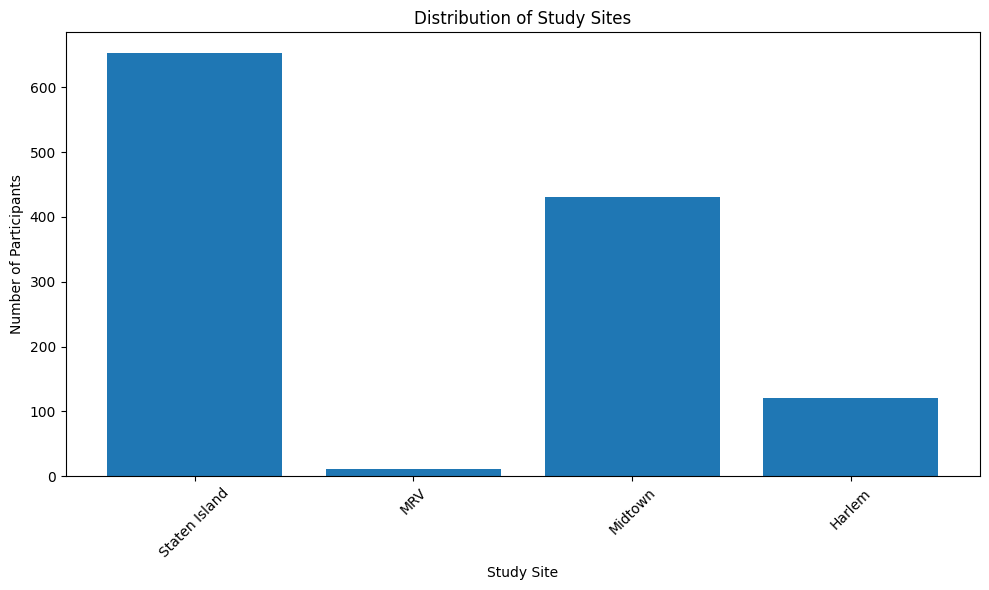

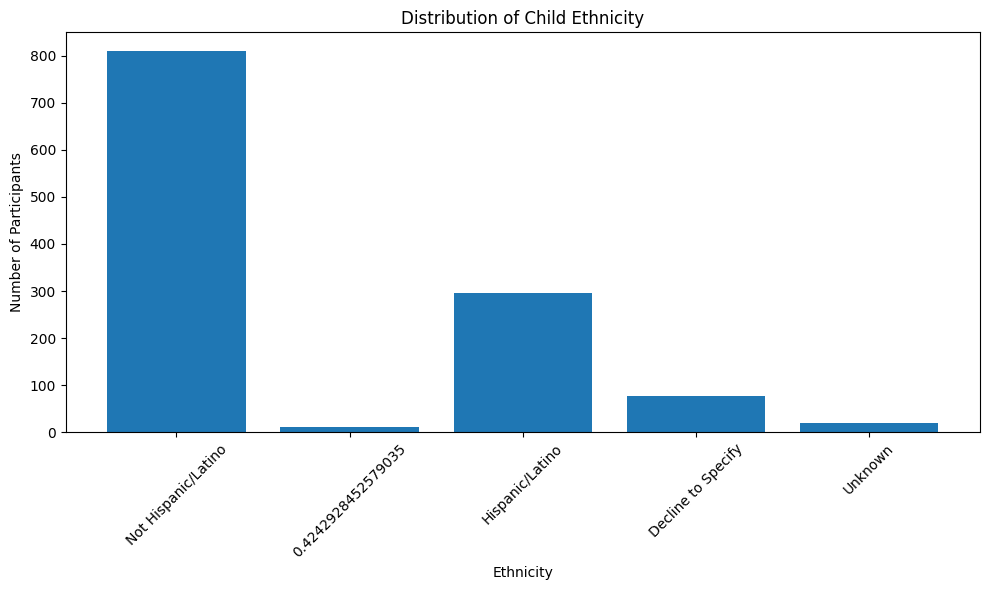

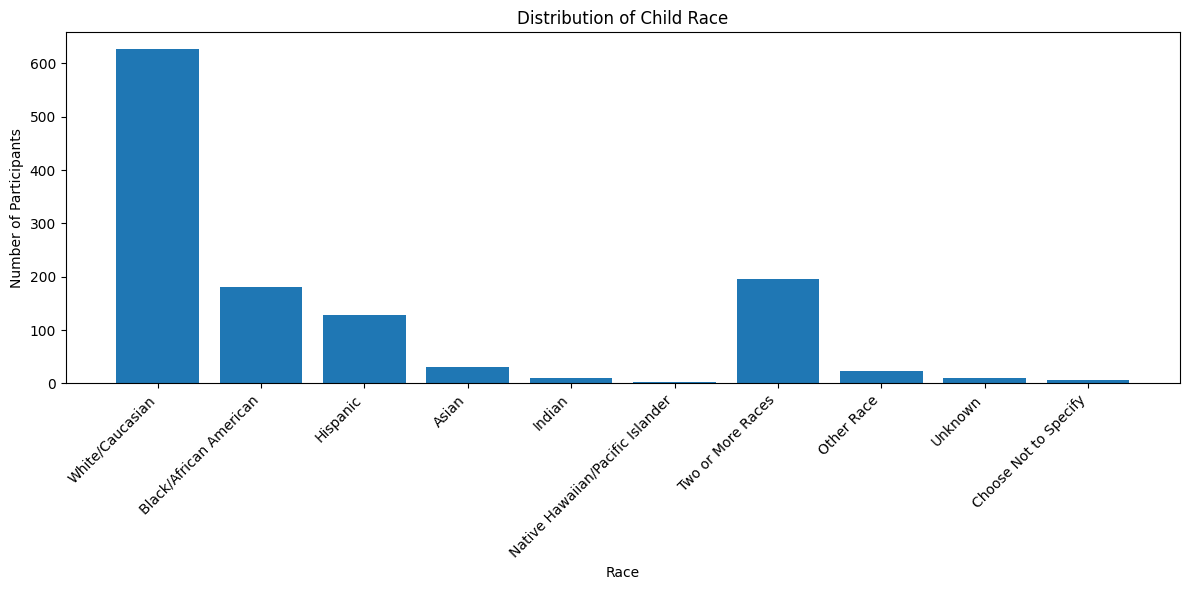

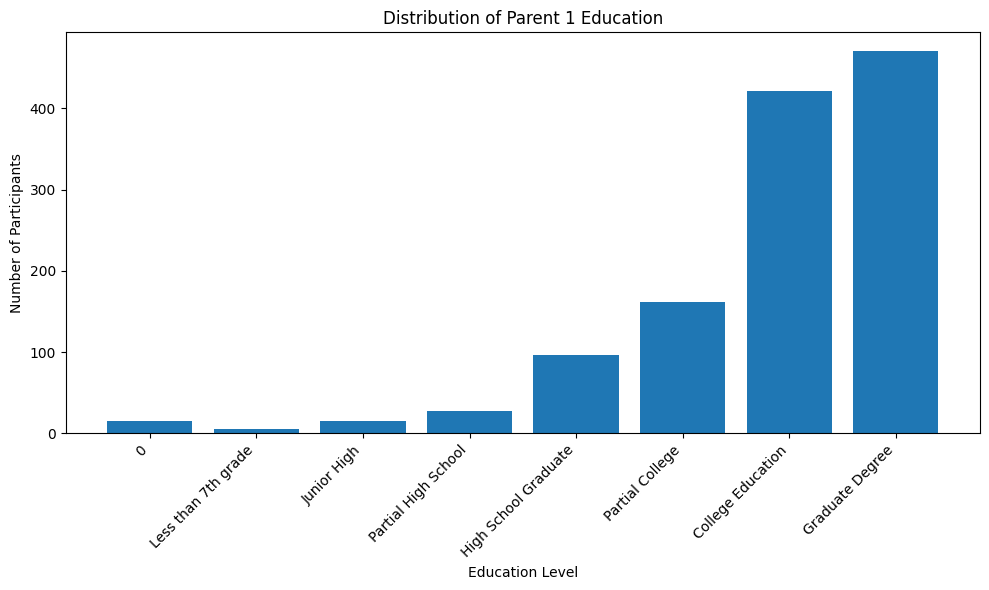

Study Site Counts:
Basic_Demos_Study_Site
1    652
2     11
3    430
4    120
Name: count, dtype: int64

Ethnicity Counts:
PreInt_Demos_Fam_Child_Ethnicity
0.000000    809
0.424293     11
1.000000    296
2.000000     77
3.000000     20
Name: count, dtype: int64

Race Counts:
PreInt_Demos_Fam_Child_Race
0     627
1     181
2     128
3      30
4      10
7       2
8     195
9      23
10     11
11      6
Name: count, dtype: int64

Parent 1 Education Counts:
Barratt_Barratt_P1_Edu
0      15
3       5
6      15
9      28
12     97
15    162
18    421
21    470
Name: count, dtype: int64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Study Site Distribution
plt.figure(figsize=(10, 6))
site_labels = ['Staten Island', 'MRV', 'Midtown', 'Harlem']
site_counts = train['Basic_Demos_Study_Site'].value_counts().sort_index()
plt.bar(site_labels, site_counts)
plt.title('Distribution of Study Sites')
plt.xlabel('Study Site')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ethnicity Distribution
plt.figure(figsize=(10, 6))
ethnicity_counts = train['PreInt_Demos_Fam_Child_Ethnicity'].value_counts().sort_index()
ethnicity_labels = {
    0: 'Not Hispanic/Latino',
    1: 'Hispanic/Latino',
    2: 'Decline to Specify',
    3: 'Unknown'
}

# Use the actual index values and corresponding labels
plt.bar(
    [ethnicity_labels.get(x, str(x)) for x in ethnicity_counts.index],
    ethnicity_counts
)
plt.title('Distribution of Child Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Race Distribution
# Race Distribution
plt.figure(figsize=(12, 6))
race_labels_dict = {
    0: 'White/Caucasian',
    1: 'Black/African American',
    2: 'Hispanic',
    3: 'Asian',
    4: 'Indian',
    5: 'Native American Indian',
    6: 'American Indian/Alaskan Native',
    7: 'Native Hawaiian/Pacific Islander',
    8: 'Two or More Races',
    9: 'Other Race',
    10: 'Unknown',
    11: 'Choose Not to Specify'
}

race_counts = train['PreInt_Demos_Fam_Child_Race'].value_counts().sort_index()

# Use actual index values and corresponding labels
plt.bar(
    [race_labels_dict.get(x, str(x)) for x in race_counts.index],
    race_counts
)
plt.title('Distribution of Child Race')
plt.xlabel('Race')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Parent 1 Education Distribution
# Parent 1 Education Distribution
plt.figure(figsize=(10, 6))
edu_labels_dict = {
    3: 'Less than 7th grade',
    6: 'Junior High',
    9: 'Partial High School',
    12: 'High School Graduate',
    15: 'Partial College',
    18: 'College Education',
    21: 'Graduate Degree'
}

edu_counts = train['Barratt_Barratt_P1_Edu'].value_counts().sort_index()

# Use actual index values and corresponding labels
plt.bar(
    [edu_labels_dict.get(x, str(x)) for x in edu_counts.index],
    edu_counts
)
plt.title('Distribution of Parent 1 Education')
plt.xlabel('Education Level')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Optional: Print out the exact counts for reference
print("Study Site Counts:")
print(site_counts)
print("\nEthnicity Counts:")
print(ethnicity_counts)
print("\nRace Counts:")
print(race_counts)
print("\nParent 1 Education Counts:")
print(edu_counts)

=== BRAIN CONNECTIVITY ANALYSIS ===
Number of brain connectivity features: 594
First few connectivity features: ['0throw_1thcolumn', '0throw_2thcolumn', '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn']


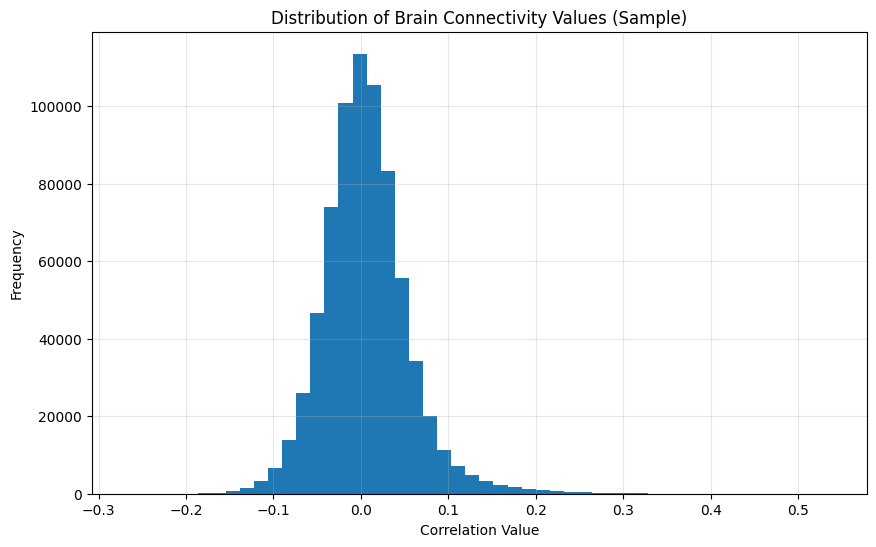

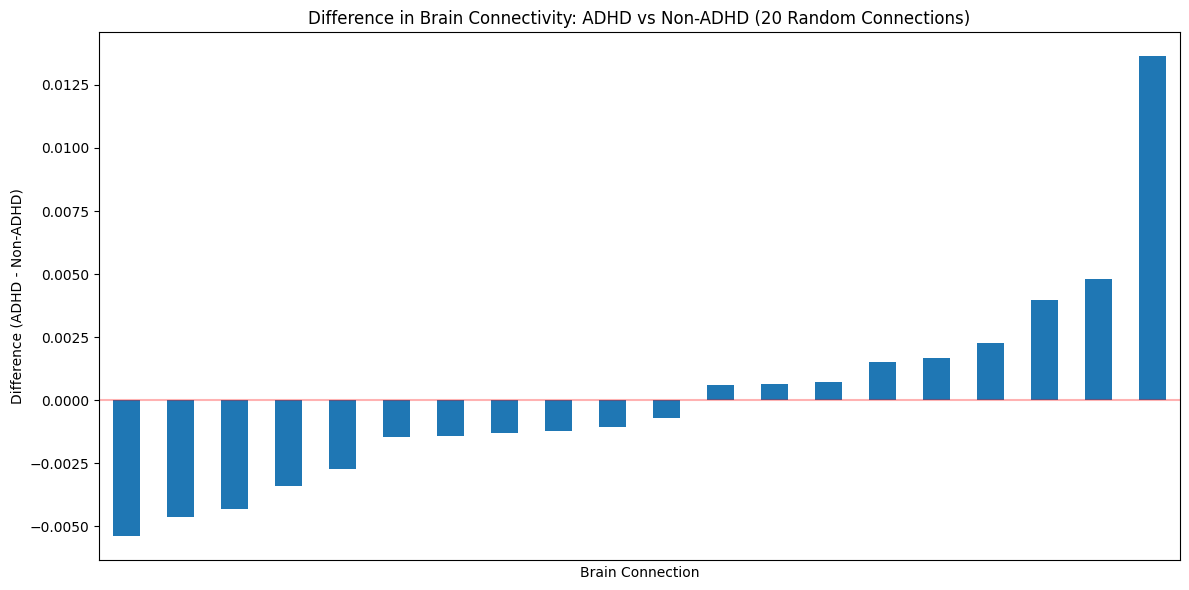

In [24]:
print("=== BRAIN CONNECTIVITY ANALYSIS ===")

# 1. Identify brain connectivity features
connectome_cols = [col for col in train.columns if (col.startswith('0throw') or
                                                    col.startswith('1throw') or
                                                    col.startswith('2throw'))]
print(f"Number of brain connectivity features: {len(connectome_cols)}")
print(f"First few connectivity features: {connectome_cols[:5]}")

# 2. Distribution of connectivity values (sample)
plt.figure(figsize=(10, 6))
# Take a random sample to avoid memory issues
sample_size = min(1000, len(connectome_cols))
np.random.seed(42)
sample_cols = np.random.choice(connectome_cols, sample_size)
all_values = train[sample_cols].values.flatten()
all_values = all_values[~np.isnan(all_values)]  # Remove NaN values if any

plt.hist(all_values, bins=50)
plt.title('Distribution of Brain Connectivity Values (Sample)')
plt.xlabel('Correlation Value')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

# 3. Simple visualization of connectivity difference between ADHD and non-ADHD
# Take just 20 random features for a simple comparison
sample_size = 20
np.random.seed(42)
tiny_sample = np.random.choice(connectome_cols, sample_size)

# Calculate means by group
adhd_means = train[train['ADHD_Outcome']==1][tiny_sample].mean()
non_adhd_means = train[train['ADHD_Outcome']==0][tiny_sample].mean()
diff = adhd_means - non_adhd_means

# Plot differences
plt.figure(figsize=(12, 6))
diff.sort_values().plot(kind='bar')
plt.title('Difference in Brain Connectivity: ADHD vs Non-ADHD (20 Random Connections)')
plt.xlabel('Brain Connection')
plt.ylabel('Difference (ADHD - Non-ADHD)')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.xticks([])  # Hide feature names to avoid clutter
plt.tight_layout()
plt.show()


=== UNDERSTANDING BRAIN CONNECTIVITY DATA ===
Number of brain connectivity features: 594
First few connectivity features: ['0throw_1thcolumn', '0throw_2thcolumn', '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn']

What do these features mean?
- Each feature (like '0throw_1stcolumn') represents the correlation between two brain regions
- Values range from -1 to +1
- Positive values: regions activate together
- Negative values: when one region activates, the other tends to deactivate
- Values close to zero: little relationship between regions

=== SAMPLE BRAIN CONNECTIVITY VALUES ===
For the first subject in our dataset:
0throw_1thcolumn: -0.0398
0throw_2thcolumn: 0.1776
0throw_3thcolumn: 0.0572
0throw_4thcolumn: 0.0376
0throw_5thcolumn: 0.1182


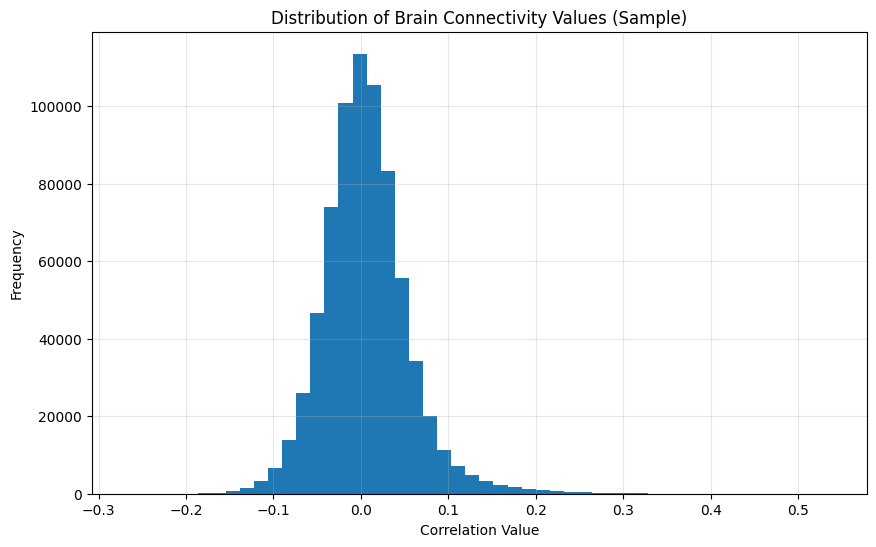


The histogram shows us how brain connectivity values are distributed.
Most values are centered around zero, with fewer strong positive or negative correlations.

=== COMPARING BRAIN CONNECTIVITY: ADHD VS NON-ADHD ===
                      ADHD  Non-ADHD  Difference
0throw_103thcolumn  0.0164    0.0028      0.0136
2throw_41thcolumn  -0.0064   -0.0010     -0.0054
1throw_73thcolumn   0.0084    0.0112     -0.0027
0throw_107thcolumn -0.0033   -0.0022     -0.0011
0throw_72thcolumn  -0.0008   -0.0014      0.0007
0throw_21thcolumn   0.0022    0.0065     -0.0043
0throw_122thcolumn -0.0013   -0.0001     -0.0012
2throw_72thcolumn   0.0111    0.0124     -0.0013
1throw_17thcolumn   0.0024   -0.0016      0.0040
1throw_133thcolumn  0.0035    0.0012      0.0023


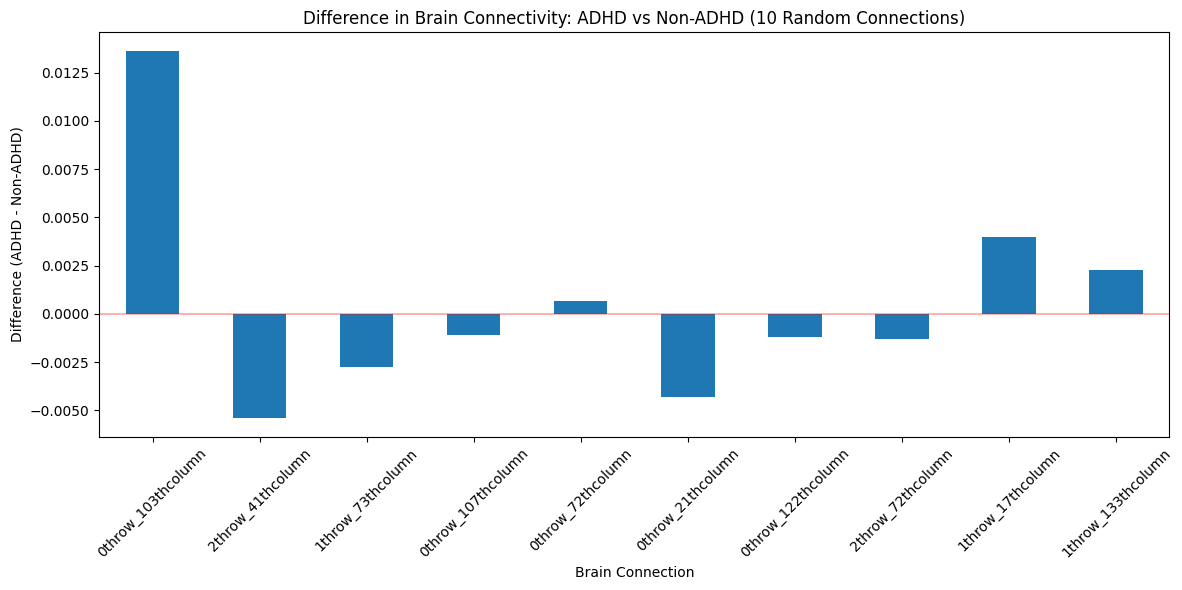


This bar chart shows differences in brain connectivity between ADHD and non-ADHD groups.
Bars above zero: connections stronger in ADHD subjects
Bars below zero: connections stronger in non-ADHD subjects
Even with just 10 random connections, we can see differences between the groups!


In [25]:
print("=== UNDERSTANDING BRAIN CONNECTIVITY DATA ===")

# 1. First, let's understand what our connectivity data looks like
connectome_cols = [col for col in train.columns if (col.startswith('0throw') or
                                                  col.startswith('1throw') or
                                                  col.startswith('2throw'))]
print(f"Number of brain connectivity features: {len(connectome_cols)}")
print(f"First few connectivity features: {connectome_cols[:5]}")

print("\nWhat do these features mean?")
print("- Each feature (like '0throw_1stcolumn') represents the correlation between two brain regions")
print("- Values range from -1 to +1")
print("- Positive values: regions activate together")
print("- Negative values: when one region activates, the other tends to deactivate")
print("- Values close to zero: little relationship between regions")


# 3. Let's look at some sample connectivity values first
print("\n=== SAMPLE BRAIN CONNECTIVITY VALUES ===")
# Show a few sample values from the first subject
sample_subject = train.iloc[0]
print("For the first subject in our dataset:")
for i, col in enumerate(connectome_cols[:5]):
    print(f"{col}: {sample_subject[col]:.4f}")

# 4. Distribution of connectivity values
plt.figure(figsize=(10, 6))
# Take a random sample to avoid memory issues
sample_size = min(1000, len(connectome_cols))
np.random.seed(42)
sample_cols = np.random.choice(connectome_cols, sample_size)
all_values = train[sample_cols].values.flatten()
all_values = all_values[~np.isnan(all_values)]  # Remove NaN values if any

plt.hist(all_values, bins=50)
plt.title('Distribution of Brain Connectivity Values (Sample)')
plt.xlabel('Correlation Value')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

print("\nThe histogram shows us how brain connectivity values are distributed.")
print("Most values are centered around zero, with fewer strong positive or negative correlations.")

# 5. Simple comparison between ADHD and non-ADHD
print("\n=== COMPARING BRAIN CONNECTIVITY: ADHD VS NON-ADHD ===")
# Take just 10 random features for a simple comparison
sample_size = 10
np.random.seed(42)
tiny_sample = np.random.choice(connectome_cols, sample_size)

# Calculate means by group
adhd_means = train[train['ADHD_Outcome']==1][tiny_sample].mean()
non_adhd_means = train[train['ADHD_Outcome']==0][tiny_sample].mean()
diff = adhd_means - non_adhd_means

# Create a comparative table
comparison = pd.DataFrame({
    'ADHD': adhd_means,
    'Non-ADHD': non_adhd_means,
    'Difference': diff
})
print(comparison.round(4))

# Plot differences
plt.figure(figsize=(12, 6))
diff.plot(kind='bar')
plt.title('Difference in Brain Connectivity: ADHD vs Non-ADHD (10 Random Connections)')
plt.xlabel('Brain Connection')
plt.ylabel('Difference (ADHD - Non-ADHD)')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nThis bar chart shows differences in brain connectivity between ADHD and non-ADHD groups.")
print("Bars above zero: connections stronger in ADHD subjects")
print("Bars below zero: connections stronger in non-ADHD subjects")
print("Even with just 10 random connections, we can see differences between the groups!")

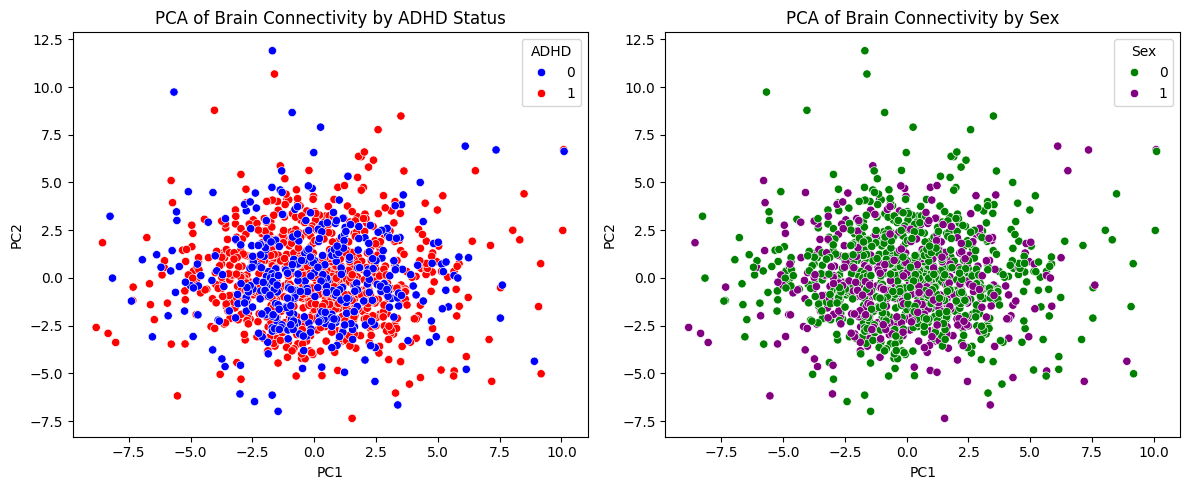

Variance explained by PC1: 1.56%
Variance explained by PC2: 1.13%


In [26]:

# 4. Simple PCA on a subset of connectivity features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Take 500 random features for PCA
sample_size = min(500, len(connectome_cols))
np.random.seed(42)
pca_sample = np.random.choice(connectome_cols, sample_size)

# Standardize the data
X = train[pca_sample].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'ADHD': train['ADHD_Outcome'].values,
    'Sex': train['Sex_F'].values
})

# Plot PCA results
plt.figure(figsize=(12, 5))

# By ADHD
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='ADHD', data=pca_df, palette=['blue', 'red'])
plt.title('PCA of Brain Connectivity by ADHD Status')

# By Sex
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Sex', data=pca_df, palette=['green', 'purple'])
plt.title('PCA of Brain Connectivity by Sex')

plt.tight_layout()
plt.show()

# Print explained variance
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")

# Implementing Modeling

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

targets = ['ADHD_Outcome', 'Sex_F']
feature_columns = [col for col in train.columns if col not in targets]

# encode categorical columns using encoder
categorical_columns = train.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    for col in categorical_columns:
        encoder = LabelEncoder()
        train[col] = encoder.fit_transform(train[col])
        test[col] = encoder.transform(test[col])

# standardize columns
scaler = StandardScaler()
train[feature_columns] = scaler.fit_transform(train[feature_columns])
test[feature_columns] = scaler.transform(test[feature_columns])

# train test split
X_train, X_val, y_train, y_val = train_test_split(train[feature_columns], train[targets], test_size=0.2, random_state=42)

print("Training Data:", X_train.shape, y_train.shape)
print("Validation Data:", X_val.shape, y_val.shape)
print("Testing Data:", test.shape)


Training Data: (970, 19927) (970, 2)
Validation Data: (243, 19927) (243, 2)
Testing Data: (1213, 19927)


In [28]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [31]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

# Base model
base_model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Multi-output wrapper
multi_model = MultiOutputClassifier(base_model)

# Fit model
multi_model.fit(X_train, y_train)

# Predict
y_pred = multi_model.predict(X_val)

# Accuracy per output
adhd_acc = accuracy_score(y_val['ADHD_Outcome'], y_pred[:, 0])
sex_acc = accuracy_score(y_val['Sex_F'], y_pred[:, 1])

# F1 per output
adhd_f1 = f1_score(y_val['ADHD_Outcome'], y_pred[:, 0])
sex_f1 = f1_score(y_val['Sex_F'], y_pred[:, 1])

print(f"ADHD Prediction F1-Score: {adhd_f1:.4f}")
print(f"Sex Prediction F1-Score: {sex_f1:.4f}")
print(f"ADHD Prediction Accuracy: {adhd_acc:.4f}")
print(f"Sex Prediction Accuracy: {sex_acc:.4f}")

ADHD Prediction F1-Score: 0.8066
Sex Prediction F1-Score: 0.5371
ADHD Prediction Accuracy: 0.7119
Sex Prediction Accuracy: 0.6667


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight= "balanced")

# Multi-output classifier to predict both ADHD and Sex
multi_rf = MultiOutputClassifier(rf_model)

# Train the model
multi_rf.fit(X_train, y_train)

# Make predictions
y_pred = multi_rf.predict(X_val)

# Convert predictions to a DataFrame for easy evaluation
import pandas as pd
y_pred_df = pd.DataFrame(y_pred, columns=y_train.columns)

# Evaluate accuracy for each target
adhd_acc = accuracy_score(y_val['ADHD_Outcome'], y_pred_df['ADHD_Outcome'])
sex_acc = accuracy_score(y_val['Sex_F'], y_pred_df['Sex_F'])

# Compute F1-score for each label (ADHD and Sex)
adhd_f1 = f1_score(y_val['ADHD_Outcome'], y_pred_df['ADHD_Outcome'])
sex_f1 = f1_score(y_val['Sex_F'], y_pred_df['Sex_F'])

print(f"ADHD Prediction F1-Score: {adhd_f1:.4f}")
print(f"Sex Prediction F1-Score: {sex_f1:.4f}")

print(f"ADHD Prediction Accuracy: {adhd_acc:.4f}")
print(f"Sex Prediction Accuracy: {sex_acc:.4f}")

ADHD Prediction F1-Score: 0.8456
Sex Prediction F1-Score: 0.0000
ADHD Prediction Accuracy: 0.7325
Sex Prediction Accuracy: 0.7037


In [36]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight (ratio of negative to positive class samples)
scale_pos_weight = sum(y_train['Sex_F'] == 0) / sum(y_train['Sex_F'] == 1)

# Train an XGBoost model with class weights
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train, y_train['Sex_F'])

# Wrap in MultiOutputClassifier for multi-label classification
multi_xgb = MultiOutputClassifier(xgb_model)

# Train the model
multi_xgb.fit(X_train, y_train)

# Make predictions
y_pred = multi_xgb.predict(X_val)

# Convert predictions to a DataFrame for easy evaluation
import pandas as pd
y_pred_df = pd.DataFrame(y_pred, columns=y_train.columns)

# Evaluate accuracy for each target
adhd_acc = accuracy_score(y_val['ADHD_Outcome'], y_pred_df['ADHD_Outcome'])
sex_acc = accuracy_score(y_val['Sex_F'], y_pred_df['Sex_F'])

# Compute F1-score for each label (ADHD and Sex)
adhd_f1 = f1_score(y_val['ADHD_Outcome'], y_pred_df['ADHD_Outcome'])
sex_f1 = f1_score(y_val['Sex_F'], y_pred_df['Sex_F'])

print(f"ADHD Prediction F1-Score: {adhd_f1:.4f}")
print(f"Sex Prediction F1-Score: {sex_f1:.4f}")

print(f"ADHD Prediction Accuracy: {adhd_acc:.4f}")
print(f"Sex Prediction Accuracy: {sex_acc:.4f}")

ADHD Prediction F1-Score: 0.8587
Sex Prediction F1-Score: 0.3048
ADHD Prediction Accuracy: 0.7819
Sex Prediction Accuracy: 0.6996


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Preprocessing: Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the neural network model
model = Sequential()

# Input layer (let's assume your data has 10 features, adjust if necessary)
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=64, activation='relu'))

# Output layer for binary classification (ADHD vs Non-ADHD)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train['ADHD_Outcome'], epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val['ADHD_Outcome']))

# Predict using the trained model
y_pred_nn = (model.predict(X_val_scaled) > 0.5).astype(int)

# Calculate F1 and Accuracy scores
f1_nn = f1_score(y_val['ADHD_Outcome'], y_pred_nn)
accuracy_nn = accuracy_score(y_val['ADHD_Outcome'], y_pred_nn)

print(f"Neural Network F1-Score: {f1_nn:.4f}")
print(f"Neural Network Accuracy: {accuracy_nn:.4f}")

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5351 - loss: 0.7402 - val_accuracy: 0.7119 - val_loss: 0.6210
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9893 - loss: 0.0709 - val_accuracy: 0.6584 - val_loss: 0.6616
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.6626 - val_loss: 0.6867
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.6584 - val_loss: 0.7005
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.6584 - val_loss: 0.7120
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.6584 - val_loss: 0.7218
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.6584 - val_loss: 0.7307
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 9.2937e-04 - val_accuracy: 0.6584

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# Preprocessing: Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the neural network model
model = Sequential()

# Input layer (let's assume your data has 10 features, adjust if necessary)
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=64, activation='relu'))

# Output layer for binary classification (ADHD vs Non-ADHD)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train['Sex_F'], epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val['Sex_F']))

# Predict using the trained model
y_pred_nn = (model.predict(X_val_scaled) > 0.5).astype(int)

# Calculate F1 and Accuracy scores
f1_nn = f1_score(y_val['Sex_F'], y_pred_nn)
accuracy_nn = accuracy_score(y_val['Sex_F'], y_pred_nn)

print(f"Neural Network F1-Score: {f1_nn:.4f}")
print(f"Neural Network Accuracy: {accuracy_nn:.4f}")

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5960 - loss: 0.7114 - val_accuracy: 0.7490 - val_loss: 0.5501
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9948 - loss: 0.0326 - val_accuracy: 0.7325 - val_loss: 0.5720
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.7407 - val_loss: 0.5809
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.7449 - val_loss: 0.5845
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.7449 - val_loss: 0.5890
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 1.0000 - loss: 9.7459e-04 - val_accuracy: 0.7449 - val_loss: 0.5940
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 7.5294e-04 - val_accuracy: 0.7407 - val_loss: 0.5983
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 5.9967e-04 - val_accuracy